In [2]:
from util_cleaning import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import numpy as np

In [25]:
df_2007 = pd.read_csv(DATABASE_PATH+'cleaned_data/power_2007.csv', sep = ';')
df_2008 = pd.read_csv(DATABASE_PATH+'cleaned_data/power_2008.csv', sep = ';')
df_2009 = pd.read_csv(DATABASE_PATH+'cleaned_data/power_2009.csv', sep = ';')
df_2010 = pd.read_csv(DATABASE_PATH+'cleaned_data/power_2010.csv', sep = ';')

In [26]:
df_2007.head()

,date,time,g_active_power,g_reactive_power,voltage,global_intensity,sub_1_kitchen,sub_2_laundry,sub_3_wh_ac
0,1/1/2007,00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,1/1/2007,00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,1/1/2007,00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,1/1/2007,00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,1/1/2007,00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0


In [27]:
df_2007 = time_rescale(df_2007, '1B')
df_2008 = time_rescale(df_2008, '1B')
df_2009 = time_rescale(df_2009, '1B')
df_2010 = time_rescale(df_2010, '1B')

Processe begin...

Begin configuring datetime line ...done
Begin dropping bug data ... done
done

Processe begin...

Begin configuring datetime line ...done
Begin dropping bug data ... done
done

Processe begin...

Begin configuring datetime line ...done
Begin dropping bug data ... done
done

Processe begin...

Begin configuring datetime line ...done
Begin dropping bug data ... done
done



In [28]:
df = pd.concat([df_2007,df_2008,df_2009,df_2010])

In [29]:
df = df.reset_index()
df = df.drop(['index'],axis=1)

In [4]:
df = pd.read_csv(DATABASE_PATH + 'cleaned_data/power_weather_1d.csv', sep = ';')
df

,full_time,g_active_power,g_reactive_power,voltage,global_intensity,sub_1_kitchen,sub_2_laundry,sub_3_wh_ac,numer_sta,pmer,...,hbas,pres,rafper,per,ssfrai,perssfrai,rr1,rr3,nnuage1,hnuage1
0,2007-01-01,1.909031,0.102836,240.128979,7.916944,0.000000,0.244444,4.083333,7149.0,102075.00,...,756.250,100978.75,12.4750,-10.0,0.0,-48.75,0.100,0.250,2.1250,701.25
1,2007-01-02,1.245669,0.103290,240.392139,5.238889,0.285417,0.268056,9.128472,7149.0,102715.00,...,800.000,101596.25,11.8500,-10.0,0.0,-45.00,0.150,0.250,2.6250,780.00
2,2007-01-03,0.359419,0.074742,241.321403,1.508889,0.000000,0.219444,1.375000,7149.0,103103.75,...,1225.000,101981.25,7.3875,-10.0,0.0,-45.00,0.000,0.050,5.2500,1110.00
3,2007-01-04,1.814479,0.136135,240.024486,7.637708,0.541319,1.627083,13.547917,7149.0,101878.75,...,700.000,100780.00,10.9250,-10.0,0.0,-41.25,0.125,0.375,4.8125,708.75
4,2007-01-05,1.124064,0.123749,234.730799,4.932431,0.643750,0.455556,5.934722,7149.0,102403.75,...,600.000,101301.25,8.0375,-10.0,0.0,-45.00,0.000,0.050,3.0000,525.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2009-12-27,1.462753,0.139300,242.670410,6.053403,0.734722,0.220833,8.645833,7149.0,100708.75,...,1090.625,99602.50,8.6125,-10.0,0.0,-41.25,0.000,0.000,2.1875,1012.50
1092,2009-12-28,1.439099,0.125317,243.777611,5.969722,0.349653,0.578472,10.370833,7149.0,100535.00,...,2597.500,99426.25,4.8250,-10.0,0.0,-45.00,0.000,0.000,3.2500,2220.00
1093,2009-12-29,1.376526,0.156614,243.183014,5.689861,0.093056,0.240278,7.086806,7149.0,99651.25,...,295.000,98575.00,7.3875,-10.0,0.0,-45.00,0.175,0.700,3.1250,273.75
1094,2009-12-30,1.516055,0.181208,241.052229,6.384792,0.951389,1.153472,8.669444,7149.0,99392.50,...,350.000,98325.00,8.6750,-10.0,0.0,-45.00,0.150,0.500,3.1250,307.50


In [52]:
df = t1d.copy()

# Choose K

In [53]:
scaler = MinMaxScaler()

In [54]:
df_to_scale = df.iloc[:,[1,4,7]]
df_to_scale = df_to_scale.dropna(how =  'any')
df_to_scale

,g_active_power,global_intensity,sub_3_wh_ac
0,1.909031,7.916944,4.083333
1,1.245669,5.238889,9.128472
2,0.359419,1.508889,1.375000
3,1.814479,7.637708,13.547917
4,1.124064,4.932431,5.934722
...,...,...,...
1091,1.462753,6.053403,8.645833
1092,1.439099,5.969722,10.370833
1093,1.376526,5.689861,7.086806
1094,1.516055,6.384792,8.669444


In [55]:
df_scaled = scaler.fit_transform(df_to_scale)
df_scaled

array([[0.72332732, 0.71016081, 0.24797935],
       [0.44680342, 0.44261908, 0.55436881],
       [0.07736837, 0.06998654, 0.08350325],
       ...,
       [0.50135173, 0.48767188, 0.43037913],
       [0.55951449, 0.55709647, 0.52649222],
       [0.56501984, 0.5556812 , 0.81854273]])

## 1. Elbow Curve

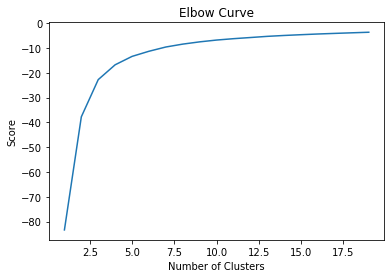

In [56]:
# optimum K
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## 2. Silhouette_score

In [57]:
for n_clusters in range(2,20):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_scaled)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_scaled, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    
# TO_DO: give a nice picture

For n_clusters = 2, silhouette score is 0.4543867069390826)
For n_clusters = 3, silhouette score is 0.4320544118300352)
For n_clusters = 4, silhouette score is 0.3941109155514643)
For n_clusters = 5, silhouette score is 0.383156014363354)
For n_clusters = 6, silhouette score is 0.35756086136047277)
For n_clusters = 7, silhouette score is 0.3608999539356258)
For n_clusters = 8, silhouette score is 0.3589238117078918)
For n_clusters = 9, silhouette score is 0.36027332153976666)
For n_clusters = 10, silhouette score is 0.3490943521202724)
For n_clusters = 11, silhouette score is 0.34339804548025404)
For n_clusters = 12, silhouette score is 0.34153201117776294)
For n_clusters = 13, silhouette score is 0.34385530973874556)
For n_clusters = 14, silhouette score is 0.34246565331901063)
For n_clusters = 15, silhouette score is 0.33885328074951154)
For n_clusters = 16, silhouette score is 0.339799333683987)
For n_clusters = 17, silhouette score is 0.34429616308709676)
For n_clusters = 18, silho

In [10]:
len(kmeans.labels_)

AttributeError: 'list' object has no attribute 'labels_'

# Test for Kmeans

In [58]:
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(df_scaled)
df_to_scale['weather_cluster'] = kmeans.labels_
df_to_scale

,g_active_power,global_intensity,sub_3_wh_ac,weather_cluster
0,1.909031,7.916944,4.083333,0
1,1.245669,5.238889,9.128472,0
2,0.359419,1.508889,1.375000,1
3,1.814479,7.637708,13.547917,0
4,1.124064,4.932431,5.934722,0
...,...,...,...,...
1091,1.462753,6.053403,8.645833,0
1092,1.439099,5.969722,10.370833,0
1093,1.376526,5.689861,7.086806,0
1094,1.516055,6.384792,8.669444,0


In [12]:
df_scaled

array([[0.72332732, 0.71016081, 0.24797935],
       [0.44680342, 0.44261908, 0.55436881],
       [0.07736837, 0.06998654, 0.08350325],
       ...,
       [0.50135173, 0.48767188, 0.43037913],
       [0.55951449, 0.55709647, 0.52649222],
       [0.56501984, 0.5556812 , 0.81854273]])

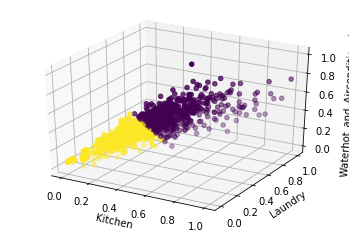

In [59]:
weather_energy = df_to_scale

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter( df_scaled[:,0], 
            df_scaled[:,1],
           df_scaled[:,2],
            c = weather_energy.weather_cluster)
ax.set_xlabel('Kitchen')
ax.set_ylabel('Laundry')
ax.set_zlabel('Waterhot_and_Airconditionning')
plt.show()

In [60]:
df_to_scale

,g_active_power,global_intensity,sub_3_wh_ac,weather_cluster
0,1.909031,7.916944,4.083333,0
1,1.245669,5.238889,9.128472,0
2,0.359419,1.508889,1.375000,1
3,1.814479,7.637708,13.547917,0
4,1.124064,4.932431,5.934722,0
...,...,...,...,...
1091,1.462753,6.053403,8.645833,0
1092,1.439099,5.969722,10.370833,0
1093,1.376526,5.689861,7.086806,0
1094,1.516055,6.384792,8.669444,0


In [61]:
plt.plot(df_2007['full_time'],df_2007['sub_3_wh_ac'])

NameError: name 'df_2007' is not defined

In [62]:
def plot_clustering(weather_energy):
    fig, ax1 = plt.subplots(figsize = (10,7))
    ax1.scatter(weather_energy.g_active_power, 
                weather_energy.sub_3_wh_ac, 
#                 s = weather_energy.windSpeed*10,
                c = weather_energy.weather_cluster)
    ax1.set_xlabel('Temperature')
    ax1.set_ylabel('Humidity')
    plt.show()

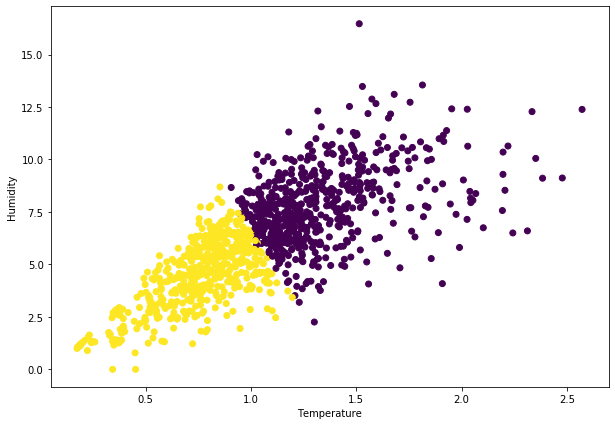

In [63]:
plot_clustering(df_to_scale)

In [17]:
df['weather_cluster'] = kmeans.labels_
df

,full_time,g_active_power,g_reactive_power,voltage,global_intensity,sub_1_kitchen,sub_2_laundry,sub_3_wh_ac,numer_sta,pmer,...,pres,rafper,per,ssfrai,perssfrai,rr1,rr3,nnuage1,hnuage1,weather_cluster
0,2007-01-01,1.909031,0.102836,240.128979,7.916944,0.000000,0.244444,4.083333,7149.0,102075.00,...,100978.75,12.4750,-10.0,0.0,-48.75,0.100,0.250,2.1250,701.25,0
1,2007-01-02,1.245669,0.103290,240.392139,5.238889,0.285417,0.268056,9.128472,7149.0,102715.00,...,101596.25,11.8500,-10.0,0.0,-45.00,0.150,0.250,2.6250,780.00,0
2,2007-01-03,0.359419,0.074742,241.321403,1.508889,0.000000,0.219444,1.375000,7149.0,103103.75,...,101981.25,7.3875,-10.0,0.0,-45.00,0.000,0.050,5.2500,1110.00,1
3,2007-01-04,1.814479,0.136135,240.024486,7.637708,0.541319,1.627083,13.547917,7149.0,101878.75,...,100780.00,10.9250,-10.0,0.0,-41.25,0.125,0.375,4.8125,708.75,0
4,2007-01-05,1.124064,0.123749,234.730799,4.932431,0.643750,0.455556,5.934722,7149.0,102403.75,...,101301.25,8.0375,-10.0,0.0,-45.00,0.000,0.050,3.0000,525.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2009-12-27,1.462753,0.139300,242.670410,6.053403,0.734722,0.220833,8.645833,7149.0,100708.75,...,99602.50,8.6125,-10.0,0.0,-41.25,0.000,0.000,2.1875,1012.50,0
1092,2009-12-28,1.439099,0.125317,243.777611,5.969722,0.349653,0.578472,10.370833,7149.0,100535.00,...,99426.25,4.8250,-10.0,0.0,-45.00,0.000,0.000,3.2500,2220.00,0
1093,2009-12-29,1.376526,0.156614,243.183014,5.689861,0.093056,0.240278,7.086806,7149.0,99651.25,...,98575.00,7.3875,-10.0,0.0,-45.00,0.175,0.700,3.1250,273.75,0
1094,2009-12-30,1.516055,0.181208,241.052229,6.384792,0.951389,1.153472,8.669444,7149.0,99392.50,...,98325.00,8.6750,-10.0,0.0,-45.00,0.150,0.500,3.1250,307.50,0


In [18]:
df1 = df[df['weather_cluster']==1]
df1

,full_time,g_active_power,g_reactive_power,voltage,global_intensity,sub_1_kitchen,sub_2_laundry,sub_3_wh_ac,numer_sta,pmer,...,pres,rafper,per,ssfrai,perssfrai,rr1,rr3,nnuage1,hnuage1,weather_cluster
2,2007-01-03,0.359419,0.074742,241.321403,1.508889,0.000000,0.219444,1.375000,7149.0,103103.75,...,101981.25,7.38750,-10.0,0.000000,-45.00,0.000,0.050,5.250000,1110.000,1
5,2007-01-06,0.724748,0.099545,235.323785,3.130556,0.000000,0.335417,5.322222,7149.0,102045.00,...,100956.25,11.38750,-10.0,0.000000,-41.25,0.125,0.225,4.250000,311.250,1
6,2007-01-07,0.712961,0.118278,240.067153,3.080694,0.171181,0.511111,3.256944,7149.0,102007.50,...,100903.75,7.45000,-10.0,0.000000,-45.00,0.000,0.000,2.875000,759.375,1
7,2007-01-08,0.752898,0.100528,234.994215,3.278889,0.300694,0.000000,6.937847,7149.0,100921.25,...,99842.50,11.70000,-10.0,0.000000,-45.00,0.050,0.275,4.250000,315.000,1
10,2007-01-11,0.344594,0.059060,240.938403,1.435972,0.000000,0.203472,1.382639,7149.0,102320.00,...,101211.25,10.73125,-10.0,0.000000,-45.00,0.025,0.025,4.395833,2696.250,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2009-12-08,0.572525,0.187512,241.808278,2.554306,0.093750,0.478472,3.465972,7149.0,101587.50,...,100482.50,7.77500,-10.0,0.000000,-45.00,0.075,0.225,1.750000,1132.500,1
1074,2009-12-10,0.938614,0.109524,240.224670,3.968611,0.143750,0.357639,6.541667,7149.0,102833.75,...,101725.00,6.75000,-10.0,0.000000,-45.00,0.150,0.225,2.156250,1993.125,1
1075,2009-12-11,0.993415,0.106149,242.279681,4.145000,0.134722,0.297917,6.529861,7149.0,102941.25,...,101817.50,7.13750,-10.0,0.000000,-41.25,0.000,0.000,2.156250,1359.375,1
1080,2009-12-16,0.948667,0.107243,247.154552,3.912083,0.085417,0.985069,5.627778,7149.0,101415.00,...,100276.25,5.25000,-10.0,0.000000,-45.00,0.000,0.000,4.937500,2385.000,1


In [19]:
df1.reset_index()

,index,full_time,g_active_power,g_reactive_power,voltage,global_intensity,sub_1_kitchen,sub_2_laundry,sub_3_wh_ac,numer_sta,...,pres,rafper,per,ssfrai,perssfrai,rr1,rr3,nnuage1,hnuage1,weather_cluster
0,2,2007-01-03,0.359419,0.074742,241.321403,1.508889,0.000000,0.219444,1.375000,7149.0,...,101981.25,7.38750,-10.0,0.000000,-45.00,0.000,0.050,5.250000,1110.000,1
1,5,2007-01-06,0.724748,0.099545,235.323785,3.130556,0.000000,0.335417,5.322222,7149.0,...,100956.25,11.38750,-10.0,0.000000,-41.25,0.125,0.225,4.250000,311.250,1
2,6,2007-01-07,0.712961,0.118278,240.067153,3.080694,0.171181,0.511111,3.256944,7149.0,...,100903.75,7.45000,-10.0,0.000000,-45.00,0.000,0.000,2.875000,759.375,1
3,7,2007-01-08,0.752898,0.100528,234.994215,3.278889,0.300694,0.000000,6.937847,7149.0,...,99842.50,11.70000,-10.0,0.000000,-45.00,0.050,0.275,4.250000,315.000,1
4,10,2007-01-11,0.344594,0.059060,240.938403,1.435972,0.000000,0.203472,1.382639,7149.0,...,101211.25,10.73125,-10.0,0.000000,-45.00,0.025,0.025,4.395833,2696.250,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1072,2009-12-08,0.572525,0.187512,241.808278,2.554306,0.093750,0.478472,3.465972,7149.0,...,100482.50,7.77500,-10.0,0.000000,-45.00,0.075,0.225,1.750000,1132.500,1
505,1074,2009-12-10,0.938614,0.109524,240.224670,3.968611,0.143750,0.357639,6.541667,7149.0,...,101725.00,6.75000,-10.0,0.000000,-45.00,0.150,0.225,2.156250,1993.125,1
506,1075,2009-12-11,0.993415,0.106149,242.279681,4.145000,0.134722,0.297917,6.529861,7149.0,...,101817.50,7.13750,-10.0,0.000000,-41.25,0.000,0.000,2.156250,1359.375,1
507,1080,2009-12-16,0.948667,0.107243,247.154552,3.912083,0.085417,0.985069,5.627778,7149.0,...,100276.25,5.25000,-10.0,0.000000,-45.00,0.000,0.000,4.937500,2385.000,1


In [20]:
df1 = df1.reset_index()
df1

,index,full_time,g_active_power,g_reactive_power,voltage,global_intensity,sub_1_kitchen,sub_2_laundry,sub_3_wh_ac,numer_sta,...,pres,rafper,per,ssfrai,perssfrai,rr1,rr3,nnuage1,hnuage1,weather_cluster
0,2,2007-01-03,0.359419,0.074742,241.321403,1.508889,0.000000,0.219444,1.375000,7149.0,...,101981.25,7.38750,-10.0,0.000000,-45.00,0.000,0.050,5.250000,1110.000,1
1,5,2007-01-06,0.724748,0.099545,235.323785,3.130556,0.000000,0.335417,5.322222,7149.0,...,100956.25,11.38750,-10.0,0.000000,-41.25,0.125,0.225,4.250000,311.250,1
2,6,2007-01-07,0.712961,0.118278,240.067153,3.080694,0.171181,0.511111,3.256944,7149.0,...,100903.75,7.45000,-10.0,0.000000,-45.00,0.000,0.000,2.875000,759.375,1
3,7,2007-01-08,0.752898,0.100528,234.994215,3.278889,0.300694,0.000000,6.937847,7149.0,...,99842.50,11.70000,-10.0,0.000000,-45.00,0.050,0.275,4.250000,315.000,1
4,10,2007-01-11,0.344594,0.059060,240.938403,1.435972,0.000000,0.203472,1.382639,7149.0,...,101211.25,10.73125,-10.0,0.000000,-45.00,0.025,0.025,4.395833,2696.250,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1072,2009-12-08,0.572525,0.187512,241.808278,2.554306,0.093750,0.478472,3.465972,7149.0,...,100482.50,7.77500,-10.0,0.000000,-45.00,0.075,0.225,1.750000,1132.500,1
505,1074,2009-12-10,0.938614,0.109524,240.224670,3.968611,0.143750,0.357639,6.541667,7149.0,...,101725.00,6.75000,-10.0,0.000000,-45.00,0.150,0.225,2.156250,1993.125,1
506,1075,2009-12-11,0.993415,0.106149,242.279681,4.145000,0.134722,0.297917,6.529861,7149.0,...,101817.50,7.13750,-10.0,0.000000,-41.25,0.000,0.000,2.156250,1359.375,1
507,1080,2009-12-16,0.948667,0.107243,247.154552,3.912083,0.085417,0.985069,5.627778,7149.0,...,100276.25,5.25000,-10.0,0.000000,-45.00,0.000,0.000,4.937500,2385.000,1


In [21]:
pw_clustered_1 = df1.to_csv(DATABASE_PATH + 'cleaned_data/pw_clustered_1.csv', sep = ';', index = False)

In [22]:
df0 = df[df['weather_cluster']==0]
df0 = df0.reset_index()
df0

,index,full_time,g_active_power,g_reactive_power,voltage,global_intensity,sub_1_kitchen,sub_2_laundry,sub_3_wh_ac,numer_sta,...,pres,rafper,per,ssfrai,perssfrai,rr1,rr3,nnuage1,hnuage1,weather_cluster
0,0,2007-01-01,1.909031,0.102836,240.128979,7.916944,0.000000,0.244444,4.083333,7149.0,...,100978.75,12.4750,-10.0,0.0,-48.75,0.100,0.250,2.1250,701.25,0
1,1,2007-01-02,1.245669,0.103290,240.392139,5.238889,0.285417,0.268056,9.128472,7149.0,...,101596.25,11.8500,-10.0,0.0,-45.00,0.150,0.250,2.6250,780.00,0
2,3,2007-01-04,1.814479,0.136135,240.024486,7.637708,0.541319,1.627083,13.547917,7149.0,...,100780.00,10.9250,-10.0,0.0,-41.25,0.125,0.375,4.8125,708.75,0
3,4,2007-01-05,1.124064,0.123749,234.730799,4.932431,0.643750,0.455556,5.934722,7149.0,...,101301.25,8.0375,-10.0,0.0,-45.00,0.000,0.050,3.0000,525.00,0
4,8,2007-01-09,1.180463,0.190051,239.355743,5.063611,0.482292,0.395139,6.759028,7149.0,...,100502.50,10.3500,-10.0,0.0,-45.00,0.000,0.025,2.2500,622.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,1091,2009-12-27,1.462753,0.139300,242.670410,6.053403,0.734722,0.220833,8.645833,7149.0,...,99602.50,8.6125,-10.0,0.0,-41.25,0.000,0.000,2.1875,1012.50,0
583,1092,2009-12-28,1.439099,0.125317,243.777611,5.969722,0.349653,0.578472,10.370833,7149.0,...,99426.25,4.8250,-10.0,0.0,-45.00,0.000,0.000,3.2500,2220.00,0
584,1093,2009-12-29,1.376526,0.156614,243.183014,5.689861,0.093056,0.240278,7.086806,7149.0,...,98575.00,7.3875,-10.0,0.0,-45.00,0.175,0.700,3.1250,273.75,0
585,1094,2009-12-30,1.516055,0.181208,241.052229,6.384792,0.951389,1.153472,8.669444,7149.0,...,98325.00,8.6750,-10.0,0.0,-45.00,0.150,0.500,3.1250,307.50,0


In [23]:
pw_clustered_0 = df0.to_csv(DATABASE_PATH + 'cleaned_data/pw_clustered_0.csv', sep = ';', index = False)

In [46]:
t07 = pd.read_csv(DATABASE_PATH + 'cleaned_data/power_2007.csv',sep=';')
t08 = pd.read_csv(DATABASE_PATH + 'cleaned_data/power_2008.csv',sep=';')
t09 = pd.read_csv(DATABASE_PATH + 'cleaned_data/power_2009.csv',sep=';')

In [47]:
test = pd.concat([t07,t08,t09])
test

,date,time,g_active_power,g_reactive_power,voltage,global_intensity,sub_1_kitchen,sub_2_laundry,sub_3_wh_ac
0,1/1/2007,00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,1/1/2007,00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,1/1/2007,00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,1/1/2007,00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,1/1/2007,00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
525595,31/12/2009,23:55:00,1.746,0.158,239.95,7.2,0.0,0.0,18.0
525596,31/12/2009,23:56:00,1.786,0.234,240.09,7.4,0.0,0.0,19.0
525597,31/12/2009,23:57:00,1.784,0.232,239.99,7.4,0.0,0.0,18.0
525598,31/12/2009,23:58:00,1.792,0.236,240.62,7.4,0.0,0.0,18.0


In [48]:
t1d = time_rescale(test,'1D')


Processe begin...

Begin configuring datetime line ...done
Begin dropping bug data ... done
done



In [49]:
t1h = tt.copy()

In [39]:
full = test['full_time']


In [43]:
date = test['full_time'].dt.date

In [45]:
date[0]

datetime.date(2007, 1, 1)

In [133]:
t1d

,full_time,g_active_power,g_reactive_power,voltage,global_intensity,sub_1_kitchen,sub_2_laundry,sub_3_wh_ac,weather_cluster,date
0,2007-01-01,1.909031,0.102836,240.128979,7.916944,0.000000,0.244444,4.083333,0,2007-01-01
1,2007-01-02,1.245669,0.103290,240.392139,5.238889,0.285417,0.268056,9.128472,0,2007-01-02
2,2007-01-03,0.359419,0.074742,241.321403,1.508889,0.000000,0.219444,1.375000,1,2007-01-03
3,2007-01-04,1.814479,0.136135,240.024486,7.637708,0.541319,1.627083,13.547917,0,2007-01-04
4,2007-01-05,1.124064,0.123749,234.730799,4.932431,0.643750,0.455556,5.934722,0,2007-01-05
...,...,...,...,...,...,...,...,...,...,...
1091,2009-12-27,1.462753,0.139300,242.670410,6.053403,0.734722,0.220833,8.645833,0,2009-12-27
1092,2009-12-28,1.439099,0.125317,243.777611,5.969722,0.349653,0.578472,10.370833,0,2009-12-28
1093,2009-12-29,1.376526,0.156614,243.183014,5.689861,0.093056,0.240278,7.086806,0,2009-12-29
1094,2009-12-30,1.516055,0.181208,241.052229,6.384792,0.951389,1.153472,8.669444,0,2009-12-30


In [134]:
for i in t1d['date']:
    t1h.loc[t1h['date'] == i , 'weather_cluster'] = t1d.loc[t1d['date']==i, 'weather_cluster']

In [136]:
t1h.head(50)

,full_time,g_active_power,g_reactive_power,voltage,global_intensity,sub_1_kitchen,sub_2_laundry,sub_3_wh_ac,date,weather_cluster
0,2007-01-01 00:00:00,2.550633,0.112800,241.361333,10.530000,0.00,0.583333,0.000000,2007-01-01,0.0
1,2007-01-01 01:00:00,2.523400,0.071633,241.096500,10.443333,0.00,0.000000,0.000000,2007-01-01,NaN
2,2007-01-01 02:00:00,2.582333,0.106667,243.200167,10.540000,0.00,0.333333,0.000000,2007-01-01,NaN
3,2007-01-01 03:00:00,2.541667,0.090100,243.265667,10.400000,0.00,0.266667,0.000000,2007-01-01,NaN
4,2007-01-01 04:00:00,2.475733,0.088167,242.456167,10.110000,0.00,0.000000,0.000000,2007-01-01,NaN
5,2007-01-01 05:00:00,2.476233,0.101667,242.348667,10.150000,0.00,0.583333,0.000000,2007-01-01,NaN
6,2007-01-01 06:00:00,2.455800,0.086133,241.221833,10.103333,0.00,0.000000,0.000000,2007-01-01,NaN
7,2007-01-01 07:00:00,2.447200,0.106867,240.314167,10.120000,0.00,0.550000,0.000000,2007-01-01,NaN
8,2007-01-01 08:00:00,2.441733,0.078100,241.143167,10.046667,0.00,0.050000,0.000000,2007-01-01,NaN
9,2007-01-01 09:00:00,3.146133,0.067600,239.778833,13.053333,0.00,0.000000,12.033333,2007-01-01,NaN


In [126]:
 t1d[t1d['date']==t1d['date'][3]]['weather_cluster'].values[0]

0

In [146]:
for i in range(1096):
    t1h.loc[t1h['date']==t1d.loc[i,'date'],'weather_cluster'] =  t1d.loc[i,'weather_cluster']

In [150]:
p0 = t1h[t1h['weather_cluster']==0]
p1 = t1h[t1h['weather_cluster']==1]

In [151]:
p0 = p0.reset_index()
p0

,index,full_time,g_active_power,g_reactive_power,voltage,global_intensity,sub_1_kitchen,sub_2_laundry,sub_3_wh_ac,date,weather_cluster
0,0,2007-01-01 00:00:00,2.550633,0.112800,241.361333,10.530000,0.0,0.583333,0.000000,2007-01-01,0
1,1,2007-01-01 01:00:00,2.523400,0.071633,241.096500,10.443333,0.0,0.000000,0.000000,2007-01-01,0
2,2,2007-01-01 02:00:00,2.582333,0.106667,243.200167,10.540000,0.0,0.333333,0.000000,2007-01-01,0
3,3,2007-01-01 03:00:00,2.541667,0.090100,243.265667,10.400000,0.0,0.266667,0.000000,2007-01-01,0
4,4,2007-01-01 04:00:00,2.475733,0.088167,242.456167,10.110000,0.0,0.000000,0.000000,2007-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...
14083,26299,2009-12-31 19:00:00,3.062867,0.186967,237.248333,12.796667,0.0,0.116667,17.900000,2009-12-31,0
14084,26300,2009-12-31 20:00:00,2.842500,0.158767,237.794500,11.900000,0.0,0.000000,17.966667,2009-12-31,0
14085,26301,2009-12-31 21:00:00,2.875367,0.215600,236.641500,12.100000,0.0,0.350000,18.716667,2009-12-31,0
14086,26302,2009-12-31 22:00:00,2.034367,0.134800,237.913833,8.520000,0.0,0.533333,17.983333,2009-12-31,0


In [152]:
p1 = p1.reset_index()
p1

,index,full_time,g_active_power,g_reactive_power,voltage,global_intensity,sub_1_kitchen,sub_2_laundry,sub_3_wh_ac,date,weather_cluster
0,48,2007-01-03 00:00:00,0.257167,0.047567,242.907167,1.060000,0.0,0.000000,0.000000,2007-01-03,1
1,49,2007-01-03 01:00:00,0.308067,0.123400,243.832333,1.383333,0.0,0.583333,0.000000,2007-01-03,1
2,50,2007-01-03 02:00:00,0.277067,0.074267,243.535167,1.183333,0.0,0.000000,0.000000,2007-01-03,1
3,51,2007-01-03 03:00:00,0.286600,0.091333,242.787333,1.226667,0.0,0.466667,0.000000,2007-01-03,1
4,52,2007-01-03 04:00:00,0.272300,0.063867,242.789167,1.150000,0.0,0.116667,0.000000,2007-01-03,1
...,...,...,...,...,...,...,...,...,...,...,...
12211,26035,2009-12-20 19:00:00,0.369567,0.094433,244.236500,1.530000,0.0,0.600000,0.000000,2009-12-20,1
12212,26036,2009-12-20 20:00:00,0.341467,0.053767,245.328500,1.416667,0.0,0.000000,0.000000,2009-12-20,1
12213,26037,2009-12-20 21:00:00,0.984767,0.059633,245.672333,4.006667,0.0,0.000000,10.900000,2009-12-20,1
12214,26038,2009-12-20 22:00:00,0.810367,0.161400,246.784333,3.336667,0.0,0.666667,0.433333,2009-12-20,1


In [145]:
t1h.loc[t1h['date']==t1d.loc[2,'date'],'weather_cluster']

48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
56    1
57    1
58    1
59    1
60    1
61    1
62    1
63    1
64    1
65    1
66    1
67    1
68    1
69    1
70    1
71    1
Name: weather_cluster, dtype: int64

In [153]:
p0.to_csv(DATABASE_PATH + 'cleaned_data/p789_c0.csv',sep=';')
p1.to_csv(DATABASE_PATH + 'cleaned_data/p789_c1.csv',sep=';')